#### 1. Analyse des liaisons entre deux variables quantitatives

#### 1.1 Analyse graphique (Commencer toujours par une analyse visuelle)

In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd

C:\Users\brech\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\brech\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\brech\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\brech\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

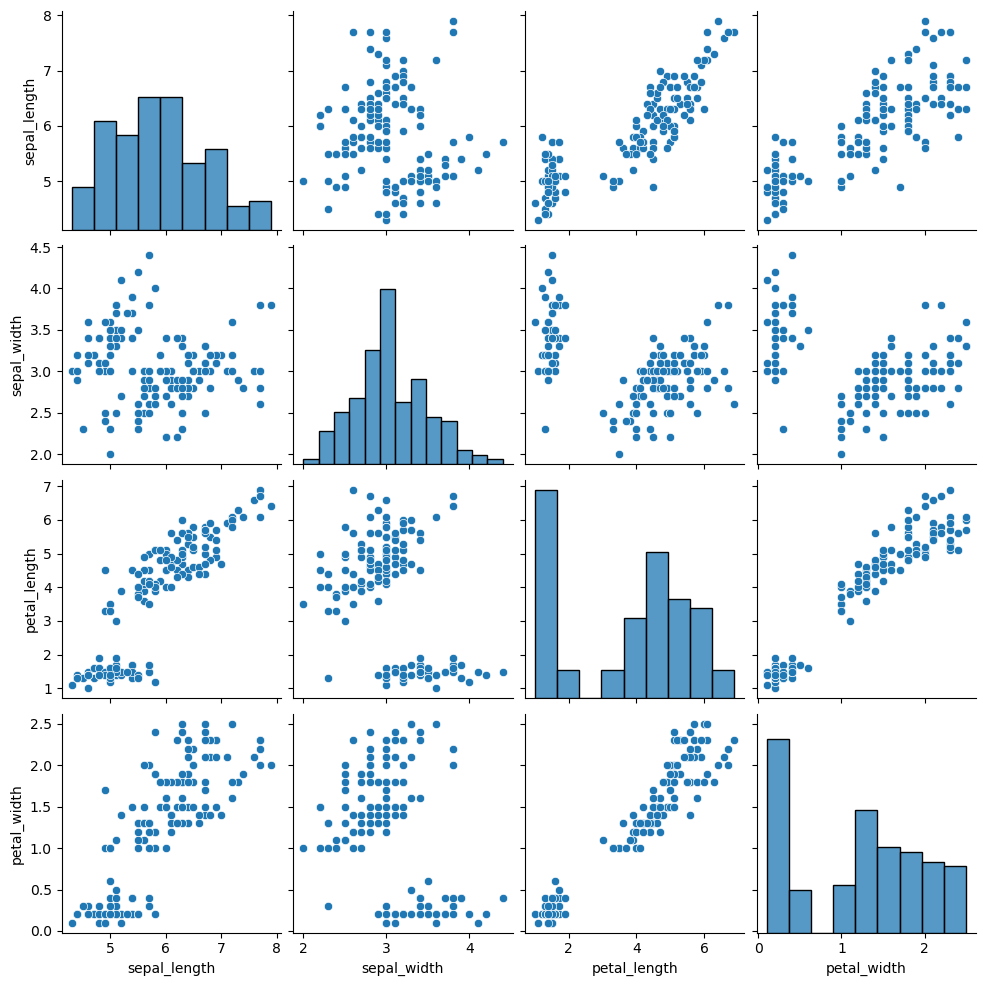

In [7]:
iris=sns.load_dataset("iris")
sns.pairplot(iris, kind="scatter")

#### Dans un premier temps, on peut faire l'analyse visuelle des graphiques pour avoir une idée sur le sens de la corrélation 

#### Etude de la normalité des variables quantitatives

#### 1.2 Test de corrélation de Pearson (s'utilise pour les correlations lineaires, c'est un test paramétrique)
Ce test repose sur la normalité. La premiere des choses c'est d'analyser la **normalité**

#### 1.2.1 Hypotheses :
- H0 (hypothese nulle) : il n'y a pas de corrélation **lineaire** entre les deux variables.
- H1 (Hypothese alternative) : Il y a une correlation **lineaire** entre les deux variables.

#### Conditions d'utilisation :
- Les deux variables sont quantitatives et mesurées sur une echelle continue.
- Les deux variables suivent une **distribution normale**

#### Interpretation :
Le coefficient de corrélation de pearson varie entre -1 et 1.

- Si le coefficient est proche de 1 par exemple (0.6). Il y a une correlation positive entre les variables.
- Si le coefficient est proche de -1 (par exemle - 0.6). Il y a une correlation négative entre les variables.
-  Si e coefficient est proche de 0, il n' y a pas de correlation linéaire entre les variables.

Vous pouvez aussi regarder la pvaleur du test:
- Si p < 0.05, on rejette Ho et on conclut qu'il y a une correlation significative entre les deux variables.
- Si p>= 0.05, on ne peut pas rejeter H0 et on conclut qu'il n'y a pas suffisament de preuves pour dire qu'il y'a une correlation significative entre
les deux variables. 


### Analyse de la normalité des variables grâce au test de Shapiro

C:\Users\brech\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


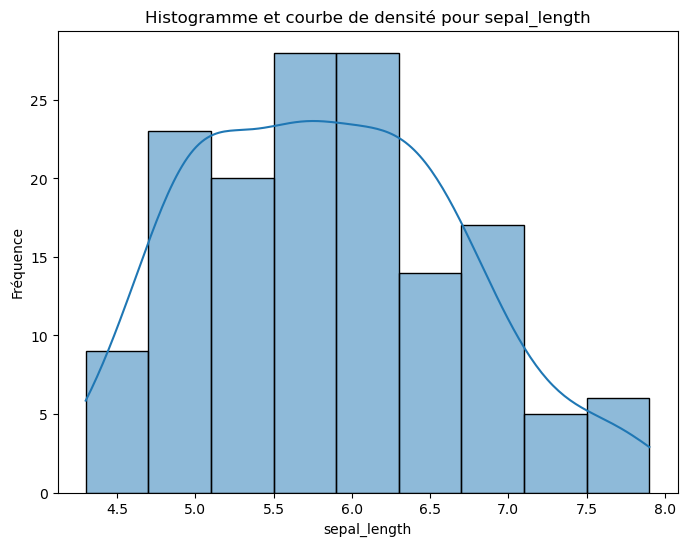

C:\Users\brech\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


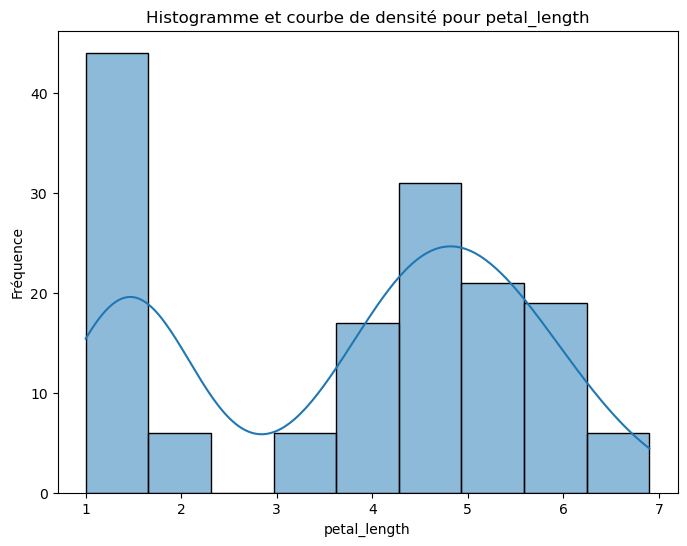

P-valeur de la normalité (Shapiro-Wilk) pour sepal_length: 0.01018026564270258
P-valeur de la normalité (Shapiro-Wilk) pour petal_length: 7.412652158755861e-10


In [20]:
# Analyse de la normalité grâce au test de Shapiro
from scipy.stats import shapiro, pearsonr, spearmanr, kendalltau
# Variables quantitatives d'intérêt
var1 = 'sepal_length'
var2 = 'petal_length'  # Correction : 'peal_length' -> 'petal_length'

# Analyse graphique de la normalité de deux variables
for var in [var1, var2]:
    plt.figure(figsize=(8, 6))
    sns.histplot(iris[var], kde=True)
    plt.xlabel(var)
    plt.ylabel('Fréquence')  # Correction : 'Frequence' -> 'Fréquence'
    plt.title(f"Histogramme et courbe de densité pour {var}")
    plt.show()

# Vérifier la normalité à l'aide du test de Shapiro-Wilk
for var in [var1, var2]:  # Correction : Utilisation de crochets pour la liste
    stat, p_value = shapiro(iris[var])  # Correction : iris(var) -> iris[var]
    print(f"P-valeur de la normalité (Shapiro-Wilk) pour {var}: {p_value}")  # Correction : rint -> print

#### Analyse:
Visuellement, ce n'est pas une loi normale
Et pour confirmer, on a la P-valeur de la normalité (Shapiro-Wilk) pour sepal_length: 0.01018026564270258 < 0.05, on rejette l'hypo nulle (hypothese 
de normalité)



In [30]:
# Calculer les coefficients de corrélation de Sperman, pearson et kendall
pearsonr(iris[var1], iris[var2])

PearsonRResult(statistic=0.8717537758865832, pvalue=1.0386674194497525e-47)

#### NB: etant donné que la normalité n'est pas vérifiée, le test de Pearson n'est pas tres adapté

### 1.3 Corrélation de Spearman ( Analyse la relation montone entre 2 variables, ne repose pas sur le test de normalite)

#### Hypothèses :
- H0 : Il n'y a pas de corrélation monotone entre les deux variables.
- H1 : Il y a une corrélation monotone entre les deux variables.

#### Conditions d'utilisation :
- Les deux variables sont quantitatives ou ordinales.
- Les données n'ont pas besoin d'être normalement distribuées.
- La relation entre les variables peut être monotone (linéaire ou non linéaire).

#### Interprétation :
Le coefficient de corrélation de Spearman varie entre -1 et 1.

- Si le coefficient est proche de 1 par exemple (0.6), il y a une corrélation positive entre les variables.
- Si le coefficient est proche de -1 (par exemple -0.6), il y a une corrélation négative entre les variables.
- Si le coefficient est proche de 0, il n'y a pas de corrélation monotone (linéaire ou non linéaire) entre les variables.

Vous pouvez aussi regarder la pvaleur du test:

- Si p < 0.05, on rejette H0 et on conclut qu'il y a une corrélation monotone significative entre les deux variables.
- Si p >= 0.05, on ne peut pas rejeter H0 et on conclut qu'il n'y a pas suffisamment de preuves pour dire qu'il y a une corrélation monotone significative entre les deux variables.

In [43]:
# Correlation de spearman
spearmanr(iris[var1], iris[var2])

SignificanceResult(statistic=0.881898126434986, pvalue=3.4430872780470036e-50)

In [ ]:
# pvalue=3.4430872780470036e-50 < 5%
# Ici, il y'a une forte relation positive monotone entre la taille du petal et la taille d sepal

#### 1.4 Test de correlation de Kendall

#### 1.4.1 Hypothèses :
- H0 : Il n'y a pas de corrélation monotone entre les deux variables.
- H1 : Il y a une corrélation monotone entre les deux variables.

#### 1.4.2 Conditions d'utilisation :
- Les deux variables sont quantitatives ou ordinales.
- Les données n'ont pas besoin d'être normalement distribuées.
- La relation entre les variables peut être monotone (linéaire ou non linéaire).
  
#### 1.4.3 Interprétation :
Le coefficient de corrélation de Kendall varie entre -1 et 1.

- Si le coefficient est proche de 1 (un seuil à 70%) , il y a une corrélation positive entre les variables.
- Si le coefficient est proche de -1, il y a une corrélation négative entre les variables.
- Si le coefficient est proche de 0, il n'y a pas de corrélation monotone entre les variables

- Si p < 0.05, on rejette H0 et on conclut qu'il y a une corrélation monotone significative entre les deux variables.
- Si p >= 0.05, on ne peut pas rejeter H0 et on conclut qu'il n'y a pas suffisamment de preuves pour dire qu'il y a une corrélation monotone significative entre les deux variables.

In [64]:
# Calcul de la correlation de kendall
kendalltau(iris[var1], iris[var2])

SignificanceResult(statistic=0.7185159275387326, pvalue=1.1691259442824266e-36)

In [66]:
# La correlation est à 0.7, cela indique une forte correlation entre les deux variables

#### Pur resumer:
#### Lorsqu'on analyse deux variables quantititatives

1- Analyse visuelle

2- On analyse la normalité pour voir si le test de pearson est adapté

3- Si pearson ne passe pas, onrealise spearman qui mesure la relation monotone et pas forcement lineaire entre deux variables

4 - Et on a l'alternanative kendall qui peut etre appliqué sur les variables ordinales

#### 2. Analyse de la liaison entre deux variables qualitatives

Dans cette partie, nous allons explorer différents tests d'association pour étudier la relation entre deux variables qualitatives. Nous utiliserons les tests du chi-carré (chi2) et de Cramér-V. Nous utiliserons le jeu de données "Titanic" populaire pour démontrer l'application de ces tests en Python.

NB: On ne parle pas de corrélation sur les variables qualitatives ( le terme est adapté aux variables quantitatives). Pour les variables qualitatives, on parle d'association ou de liaison.

C:\Users\brech\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\brech\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


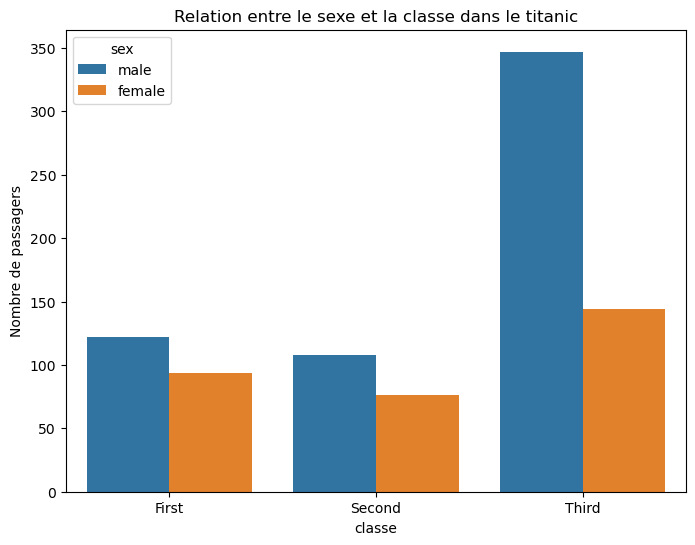

In [72]:
# On commence par l'analyse graphique, ici on fera le barplot

# Analyse graphique entre sex et class de titanic
titanic = sns.load_dataset("titanic")
# Creer un graphique de la relation entre "sex" et "class" dans Titanic
plt.figure(figsize=(8,6))
sns.countplot(data=titanic, x='class', hue='sex')
plt.xlabel('classe')
plt.ylabel('Nombre de passagers')
plt.title('Relation entre le sexe et la classe dans le titanic')
plt.show()

In [76]:
# Analyse : la plupart des gens qui prennent des billets en troisieme classe se sont les hommes
# Le graphique vous donne l'intuition, un test du Chi2 permet de confirmer les intuitions

#### 2.1 1. Test du chi-carré(chi2)

#### Hypothèses
- H0 (hypothèse nulle): Il n'y a pas d'association entre les deux variables qualitatives.
- H1 (hypothèse alternative): Il y a une association entre les deux variables qualitatives.

#### Conditions d'utilisation
- Les deux variables sont qualitatives (catégoriques).
- Les effectifs attendus sont supérieurs à 5 pour chaque croissement de variable

#### Interprétation
Si la p-valeur est inférieure au seuil de significativité (généralement 0,05), on rejette l'hypothèse nulle et on conclut qu'il y a une association entre les deux variables qualitatives

In [88]:
# Conditions
# Tous les groupes dans les variables doivent avoir au moins 5 modalités

# Cacul de Chi2 sur la base titanic
from scipy.stats import chi2_contingency
# Creer un tableau de contingence
contingency_table = pd.crosstab(titanic['sex'], titanic['class'])
contingency_table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


In [90]:
# Effectuer le test du chi-carré
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

# Afficher les résultats
print("Statistique du chi-carré :", chi2_stat)
print("P-valeur :", p_value)
print("Degrés de liberté :", dof)
print("Fréquences attendues :\n", expected_freq)

Statistique du chi-carré : 16.971499095517114
P-valeur : 0.00020638864348233114
Degrés de liberté : 2
Fréquences attendues :
 [[ 76.12121212  64.84399551 173.03479237]
 [139.87878788 119.15600449 317.96520763]]


In [92]:
# P-valeur : 0.00020638864348233114 < 0.05, existence d'une association entre les deyx variables qualitatives

#### Coefficient de Cramér-V ( permet de quantifier l'intensité de la relation)
Le coefficient de Cramér-V mesure la force de l'association entre deux variables qualitatives. Il varie entre 0 (pas d'association) et 1 (association parfaite).

#### Conditions d'utilisation
- Les deux variables sont qualitatives (catégoriques).
- Le test du chi-carré a déjà été effectué et a montré une association significative entre les deux variables.

#### Interprétation
Plus la valeur de Cramér-V est proche de 1 (supérieur à 0.60), plus l'association entre les deux variables est forte.

In [97]:
# Calculer le coefficient de Cramer_V
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramer_v = np.sqrt(chi2_stat / (n * min_dim))

# Afficher le coefficient de Cramer-V
print("Coefficient de Cramer-V :", cramer_v)

Coefficient de Cramer-V : 0.1380133986221395


In [99]:
# Il n' y a ps forcement une relation entre les deux variables

#### 2.3 Coefficient T de Tschuprow (plus adapté lorsque le nombre de modalités entre les deux variables est deséquilibré)
Le coefficient T de Tschuprow est une mesure de liaison entre deux variables qualitatives. Il est basé sur le chi-carré (χ²) et prend en compte la taille de l'échantillon et le nombre de catégories dans chaque variable.

#### 2.3.1 Hypothèses
- H0 (hypothèse nulle): Il n'y a pas de relation entre les deux variables qualitatives.
- H1 (hypothèse alternative): Il y a une relation entre les deux variables qualitatives.

#### Conditions d'utilisation
- Les variables sont qualitatives.
- Les observations sont indépendantes.
- Les effectifs des cellules du tableau de contingence sont suffisants (généralement, chaque cellule doit avoir un effectif d'au moins 5).

#### Interprétation
Le coefficient T de Tschuprow varie entre 0 et 1. Une valeur proche de 0 indique une faible liaison entre les deux variables, tandis qu'une valeur proche de 1 indique une liaison forte. La force de la liaison dépend du contexte et de la discipline, mais en général, une valeur supérieure à 0,3 est considérée comme une liaison modérée et une valeur **supérieure à 0,5 est considérée comme une liaison forte.**

In [104]:
# Calculer le coefficient T tschuprow
n= titanic.shape[0]
min_dim = min(contingency_table.shape) - 1
# Effectuer le test du chi-carré
chi2, p_value, _,_=st.chi2_contingency(contingency_table)
tschuprow_t = np.sqrt(chi2 / (n * min_dim))

print("Coefficient T de Tschuprow : ", tschuprow_t)
print("P-valeur : ", p_value)

Coefficient T de Tschuprow :  0.1380133986221395
P-valeur :  0.00020638864348233114


In [106]:
# Ici l'intensité de la relation n'est pas trop importance. plus elle sera proche de 1 plus elle sera importante

### Analyse de la liaison entre une variable qualitative et une variable quantitative

Dans cette, nous allons explorer différents tests pour étudier la liaison entre une variable qualitative et une variable quantitative. Nous utiliserons les tests de Student (t-test), ANOVA, Mann-Whitney, Kruskal-Wallsi. Nous utiliserons le jeu de données "Iris" populaire pour démontrer l'application de ces tests en Python.

#### 3.1 Analyse graphique (toujours commencé par une analyse graphique, pour une premiere idée de la relation)

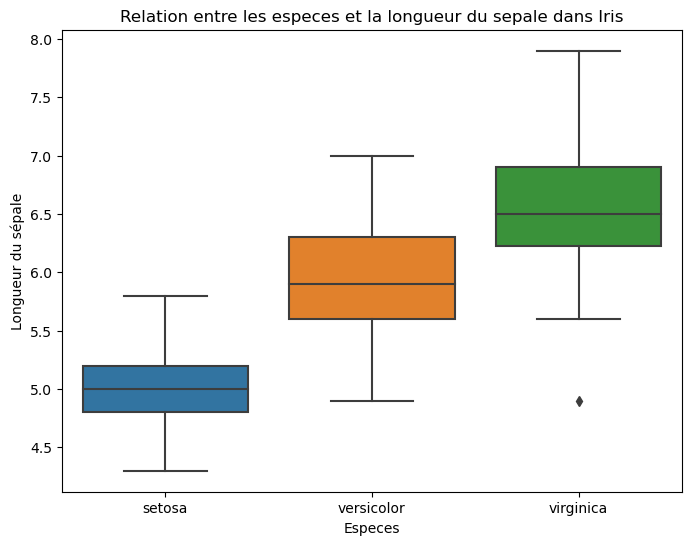

In [114]:
# Boxplot bivarié
# Creer un boxplot de la relation entre 'species' et 'sepal_length' dans Iris
plt.figure(figsize=(8,6))
sns.boxplot(data = iris, x='species', y='sepal_length')
plt.xlabel('Especes')
plt.ylabel('Longueur du sépale')
plt.title('Relation entre les especes et la longueur du sepale dans Iris')
plt.show()

In [116]:
## Analyse : virginica semble avoir une longueur de sepal plus élevé que versicolor  qui a des sepales plus long que stosa

#### 3.2 Test de student (t-test) (plus adapté lorsqu'on a que deux modalités) - test parametrique

Il permet de verifier si la moyenne des deux groupes est la meme

#### Hypothèses
- H0 (hypothèse nulle): Les moyennes des deux groupes sont égales.
- H1 (hypothèse alternative): Les moyennes des deux groupes sont différentes.

#### Conditions d'utilisation
- La variable quantitative est normalement distribuée dans chaque groupe.
- Les variances des deux groupes sont égales.
- Les observations sont indépendantes.

#### Interprétation
Si la p-valeur est inférieure au seuil de significativité (généralement 0,05), on rejette l'hypothèse nulle et on conclut que les moyennes des deux groupes sont significativement différentes.

In [ ]:
from scipy.stats import ttest_ind, f_oneway, manwhiteneyu, kruskal, wilcoxon

# charger le jeu de données Iris
iris = sns.load_dataset('iris')

# Separer les données en deux groupes pour le test de Student et le test de Mann-Whitney
setosa=iris[iris['species'] == 'setosa']['sepal_length']
virginica = iris[iris['species']== 'virginica']['sepal_length']

P-valeur de la normalité (shapiro-wilk) - Setosa: 0.4595010578632355
P-valeur de la normalité (shapiro-wilk) - virginica: 0.25831347703933716
P-valeur de la normalité (shapiro-wilk) - versicolor: 0.4647378921508789


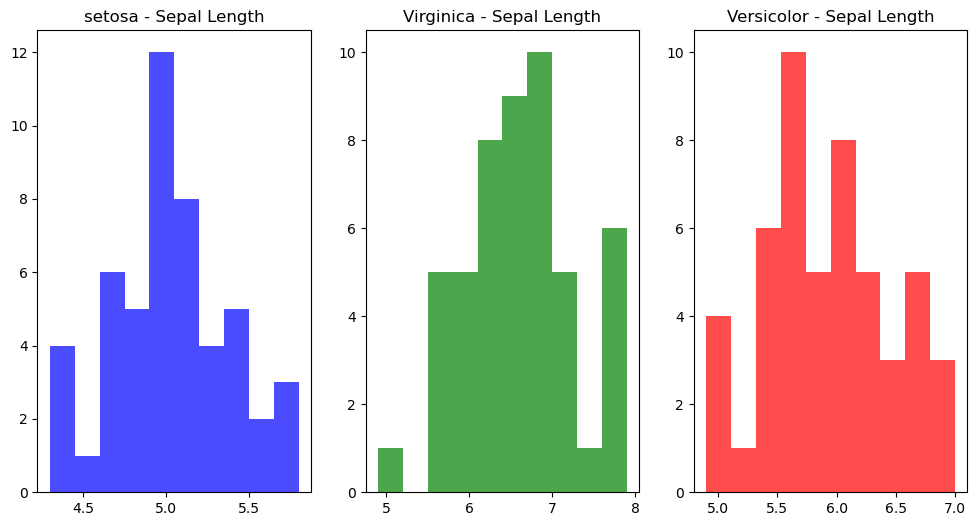

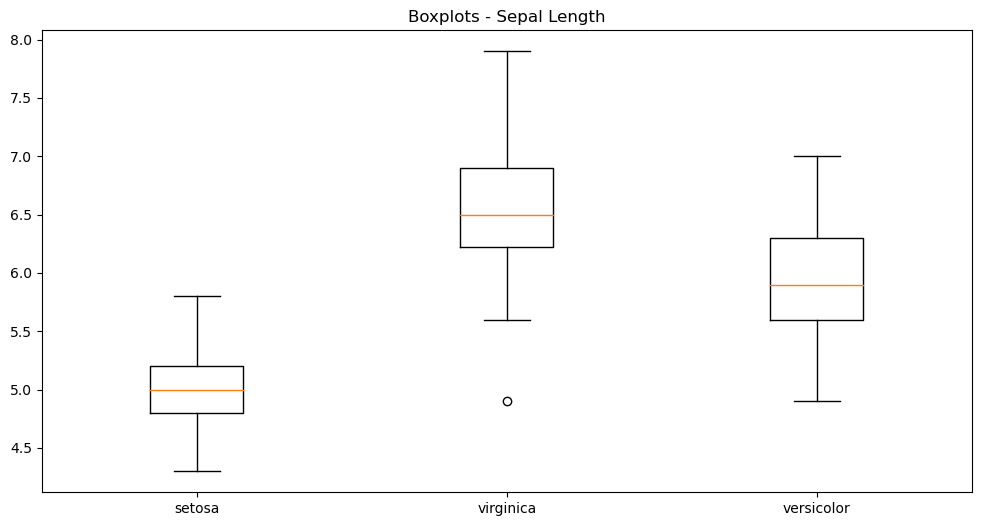

In [130]:
# Verification de la normalité 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, ttest_ind, f_oneway, mannwhitneyu, kruskal

# charger le jeu de données Iris
iris = sns.load_dataset('iris')

# Separer les données en groupes en fonction de l'espece
setosa = iris[iris['species']=='setosa']['sepal_length']
virginica = iris[iris['species']=='virginica']['sepal_length']
versicolor = iris[iris['species']=='versicolor']['sepal_length']

# Verifier la normalité à l'aide du test de shapiro-wilk
_, setosa_p_value = shapiro(setosa)
_, virginica_p_value = shapiro(virginica)
_, versicolor_p_value = shapiro(versicolor)

print("P-valeur de la normalité (shapiro-wilk) - Setosa:", setosa_p_value)
print("P-valeur de la normalité (shapiro-wilk) - virginica:", virginica_p_value)
print("P-valeur de la normalité (shapiro-wilk) - versicolor:", versicolor_p_value)

# Histogramme pour veifier visuellement la normalité
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.hist(setosa, bins=10, color='blue', alpha=0.7)
plt.title("setosa - Sepal Length")
plt.subplot(132)
plt.hist(virginica, bins=10, color='green', alpha=0.7)
plt.title("Virginica - Sepal Length")
plt.subplot(133)
plt.hist(versicolor, bins=10, color='red', alpha=0.7)
plt.title("Versicolor - Sepal Length")
plt.show()

# Boites à moustaches pour verifier visuellement la normalité
plt.figure(figsize=(12, 6))
plt.boxplot([setosa, virginica, versicolor], labels=['setosa', 'virginica', 'versicolor'])
plt.title('Boxplots - Sepal Length')
plt.show()

In [132]:
# Regardons le test de shapiro
# P-valeur de la normalité (shapiro-wilk) - Setosa: 0.4595010578632355
# P-valeur de la normalité (shapiro-wilk) - virginica: 0.25831347703933716
# P-valeur de la normalité (shapiro-wilk) - versicolor: 0.4647378921508789

# Toutes les p_values sont > à 0.05, On accepte l'hypothese nulle , la normalité est vérifiée sur la base de données

In [134]:
# Test de Student (t-test)
t_stat, t_p_value = ttest_ind(setosa, virginica)
print("Statistique t de Student : ", t_stat)
print("P-valeur (t-test) : ", t_p_value)

Statistique t de Student :  -15.386195820079404
P-valeur (t-test) :  6.892546060674059e-28


In [136]:
# La P-valeur (t-test) :  6.892546060674059e-28 est < 0.05 La taille des sepal sur setosa et virginica sont signifcativement differents au 
# regard de l'echantillon que nous avons utilisé

#### 3.3 Test de Mann-Whitney (non parametrique)

#### Hypotheses
- H0 (Hypothese nulle): Les distributions des deux groupes sonte egales.
- H1 (Hypothese alternative) : les distributions des deux groupes sont differentes.

#### Conditions d'utilisation
- Les observations sont indépendantes.
- Les données peuvent etre ordonnées (au moins ordinale).

In [147]:
# Test de Mann -Whitney
mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(setosa, virginica)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) : ", mann_whitney_p_value)

Statistique U de Mann-Whitney : 38.5
P-valeur (Mann-Whitney) :  6.396699069396538e-17


In [ ]:
# la P-valeur (Mann-Whitney) :  6.396699069396538e-17 < 0.05 , les fleurs setosa et virginica sempble avoir des tailles de sepal different

#### 3.4 ANOVA (Analysis  of Variance)

In [149]:
# L'anova va permettre de comparer les differences dans plusieurs groupes simultanement

#### Hypothèses
- H0 (hypothèse nulle) : Les moyennes de tous les groupes sont égales.
- H1 (hypothèse alternative) : Au moins une des moyennes des groupes est différente des autres

#### Conditions d'utilisation
- La variable quantitative est normalement distribuée dans chaque groupe.
- Les variances des groupes sont égales.
- Les observations sont indépendantes.

#### Interprétation
Si la p-valeur est inférieure au seuil de significativité (généralement 0,05), on rejette l'hypothèse nulle et on conclut qu'au moins une des moyennes des groupes est significativement différente des auutres.

#### Interprétation
Si la p-valeur est inférieure au seuil de significativité (généralement 0,05), on rejette l'hypothèse nulle et on conclut que les distributions des deux groupes sont significativement différentes.


In [154]:
# ANOVA
anova_stat, anova_p_value = f_oneway(setosa, virginica, versicolor)
print("Statistique F de l'anova :", anova_stat)
print("P_value (ANOVA) : ", anova_p_value)

Statistique F de l'anova : 119.26450218450468
P_value (ANOVA) :  1.6696691907693826e-31


In [156]:
# Ici , on a la P_value (ANOVA) :  1.6696691907693826e-31 < 0.05, la difference est statistiquement significative, on peut dire que la taille des sépales
# entre setosa, virginica et versicolor sont statistiquement differents

#### L'ANOVA depend de l'egalité des variances

#### Test de Levene analyse l'égalité des variances
Le test de Levene est utilisé pour vérifier l'hypothèse d'égalité des variances entre plusieurs groupes. Il est 
particulièrement utile après l'ANOVA pour vérifier l'hypothèse d'homoscédasticité.

#### Hypothèses
- H0 (hypothèse nulle): Les variances des différents groupes sont égales.
- H1 (hypothèse alternative): Au moins une des variances des différents groupes est différente.

#### Conditions d'utilisation
- Les échantillons sont indépendants.
- Les observations dans chaque groupe sont indépendantes et identiquement distribuées.

#### Interprétation
Si la p-valeur est inférieure à un seuil de signification prédéfini (par exemple, 0,05), on rejette l'hypothèse nulle et on conclut que les variances ne sont pas égales entre les groupes.


In [163]:
from scipy.stats import levene

# Test de Levene pour l'égalité des variances
levene_stat, levene_p_value = levene(setosa, virginica, versicolor)
print("Statistique W de Levene :", levene_stat)
print("P_valeur (Levenne) :", levene_p_value)

Statistique W de Levene : 6.35272002048269
P_valeur (Levenne) : 0.0022585277836218586


#### la P_valeur (Levenne) : 0.0022585277836218586 < 0.05 , on rejette l'hypothese H0, cela implique que la variance n'est pas égale, l'ANOVA n'est pas valide, il faut choisir un test non parametrique

#### 3.8 Test de Kruskal-Wallis

#### Hypothèses

- H0 (hypothèse nulle) : Les distributions de tous les groupes sont égales.
- H1 (hypothèse alternative) : Au moins une des distributions des groupes est différente des autres.

#### Conditions d'utilisation
- Les observations sont indépendantes.
- Les données peuvent être ordonnées (au moins ordinale).


In [176]:
# Test de Kruskal-Wallis

kruskal_stat, kruskal_p_value = kruskal(setosa, virginica, versicolor)
print("Statistique H de Kruskal-Wallis :", kruskal_stat)
print("P-valeur (Kruskal-Wallis):", kruskal_p_value)

Statistique H de Kruskal-Wallis : 96.93743600064833
P-valeur (Kruskal-Wallis): 8.91873433246198e-22


In [178]:
# La taille des sepals des differentes est statistiquement significatives car la P-valeur (Kruskal-Wallis): 8.91873433246198e-22 < 0.5 (rejet de H0)
# , la taille des differentes fleurs est statistiquement differentes

#### Resumé:
Commencé par l'analyse visuelle qui nous donne une intuition qui est confirmé ou infirmer par un test statistique
1- Lorsqu'on a deux variables quantitatives, on commence par faire un nuage de points
2- Suivi par un test de pearson qui analyse la relation entre deux variables normalement distribuées
3- passé par test non parametrique (comme spearman) qui analyse la corrélation qui analyse la relation monotone entre deux variables quantitatives, on a aussi l'alternative avec le test de Kendall qui anlyse la relation monotone
a- Pour les variables qualitatives, commencer par faire un barplot, ensuite un test de chi2 qui dira s'il y'a association entre les variables
b- si l'association est confirmé, mettez en place un v-de cramer qui va donner l'intensité de cette association
A- Enfin, lorsqu'on au une variable quanti et une variable quali,
B-  si l'on deux modalités, faire un test de student au cas ou la normalité est vérifiée
C- si la normalité n'est pas vérifié, faire un test de Mann-Whitney Wilcox
D- Avec plus de trois modalités, faire soit l'ANOVA si la normalité des moyennes et l'egalité des variances est vérifié sinon faire un test de Kruskal
wallis